# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('demo01.csv')
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [3]:
X = df.drop('mau', axis=1)
y = df['mau']

In [4]:
X = pd.get_dummies(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
modelo = DecisionTreeClassifier(random_state=100)

In [7]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

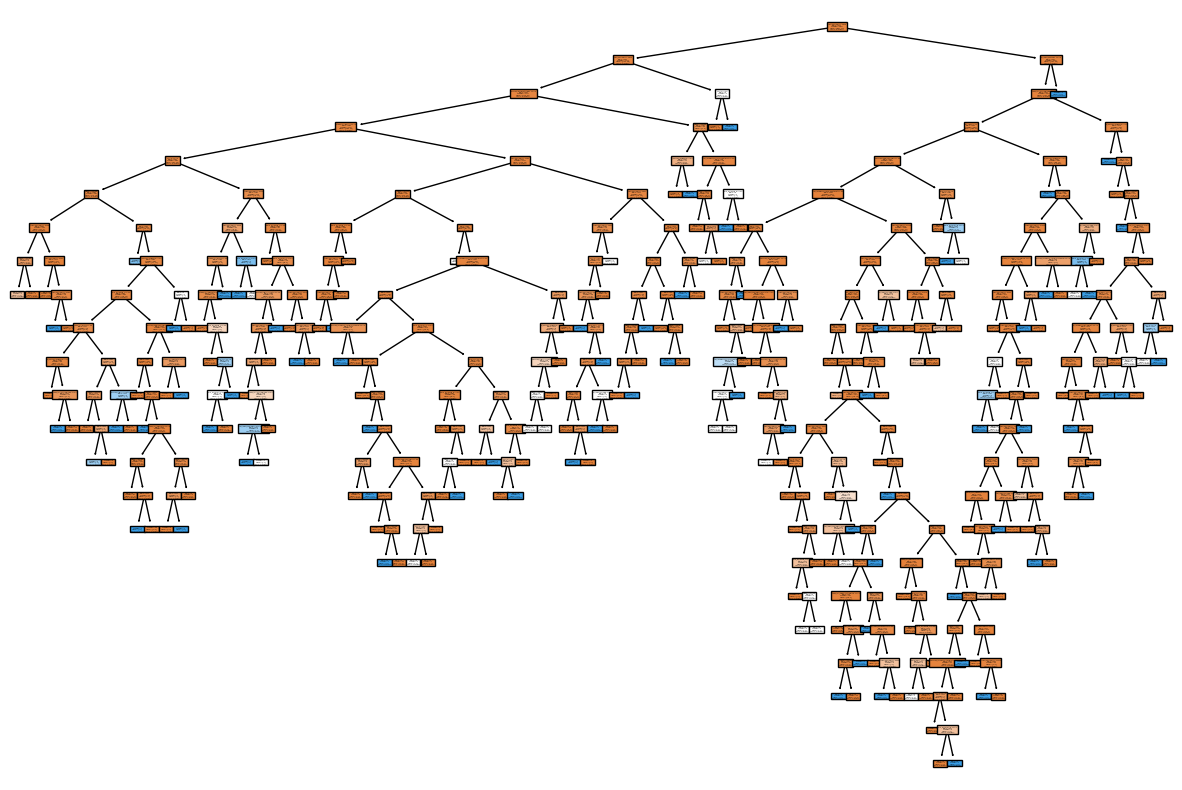

In [8]:
plt.figure(figsize=(15,10))
plot_tree(modelo, filled=True, feature_names=list(X_train.columns), class_names=['Aprovados', 'Reprovados'])
plt.show()

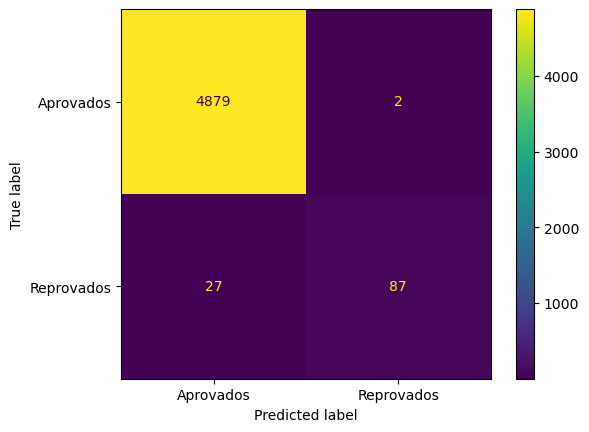

In [9]:
ConfusionMatrixDisplay.from_estimator(modelo, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])

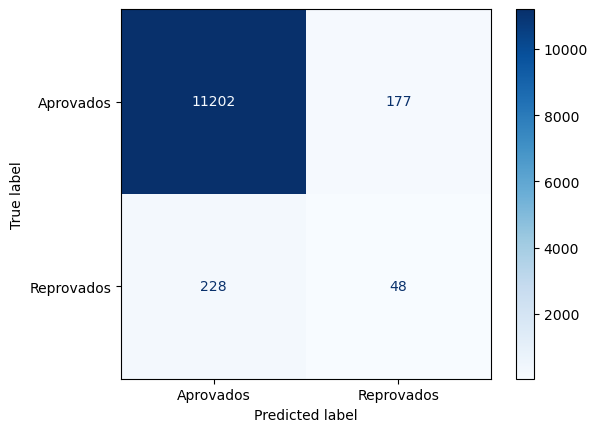

In [10]:
y_pred = modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [60]:
train_accuracy = accuracy_score(y_train, modelo.predict(X_train))
train_accuracy

0.9935935935935936

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [62]:
y_pred_test = modelo.predict(X_test)

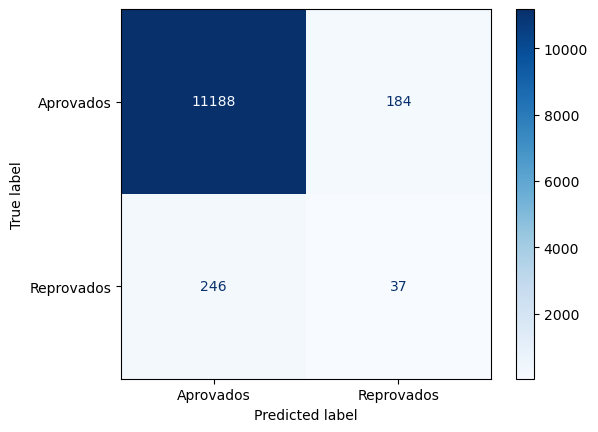

In [63]:
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Aprovados', 'Reprovados'])
disp_test.plot(cmap=plt.cm.Blues)
plt.show()

In [65]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_accuracy

0.9631059631059631

In [75]:
train_accuracy = accuracy_score(y_train, modelo.predict(X_train))
train_accuracy

0.9935935935935936

In [67]:
modelo_novo = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_novo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

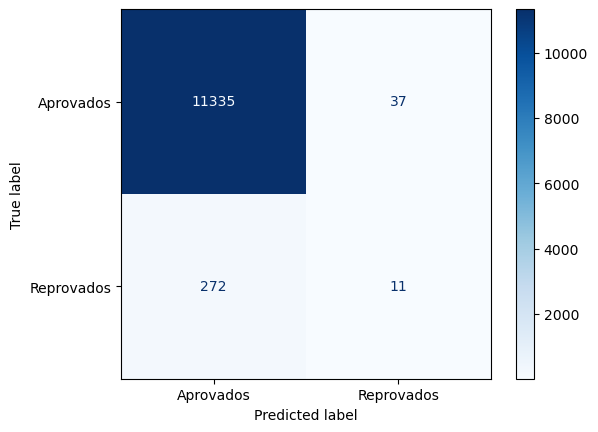

In [69]:
y_pred_test_novo = modelo_novo.predict(X_test)
cm_test_new = confusion_matrix(y_test, y_pred_test_novo)
disp_test_new = ConfusionMatrixDisplay(confusion_matrix=cm_test_new, display_labels=['Aprovados', 'Reprovados'])
disp_test_new.plot(cmap=plt.cm.Blues)
plt.show()

In [72]:
proportion_mau = sum(y_pred_test_novo) / len(y_pred_test_novo)
proportion_mau

0.004118404118404118

In [74]:
all_good_accuracy = accuracy_score(y_test, ['bom'] * len(y_test))
all_good_accuracy

C:\Users\natha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:226: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0